In [1]:
%pip install kmodes scikit-learn-extra 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

# Non-Hierarchical Clustering Models
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes
from sklearn.cluster import DBSCAN
from sklearn.cluster import BisectingKMeans
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
import umap
from sklearn.manifold import TSNE

# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Extra
output_dir = 'main/'
os.makedirs(output_dir, exist_ok=True)

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = 'FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx'

In [4]:
df = pd.read_excel(path)

In [5]:
demographics = df[['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability', 'states']]
demographics.head(3)

age  gender     ethnicity             race    education marital_status  \
0  45-54  female  non hispanic  native american  High School             na   
1  18-24    male      hispanic            white  High School         single   
2  25-34  female  non hispanic      multiracial    Associate         single   

              income          employment language                  disability  \
0  $25,000 - $49,999  Employed Part time     both  i do not have a disability   
1  Less than $25,000  Employed Part time  english  i do not have a disability   
2  Less than $25,000             Student  english  i do not have a disability   

     states  
0   indiana  
1  illinois  
2  new York

In [6]:
tones = df[['sample_1','sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7','sample_8']]

In [7]:
tones.head(3)
tones_text = df[['sample_1','sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7','sample_8']]

## <a id='toc1_1_'></a>[Encoding | Scaling](#toc0_)

In [8]:
tones_list = tones.columns.tolist()

In [9]:
encoder = LabelEncoder()

for question in tones_list:
    tones.loc[:, question] = encoder.fit_transform(tones[question])
tones.head(3)

sample_1 sample_2 sample_3 sample_4 sample_5 sample_6 sample_7 sample_8
0        2        3        0        2        1        1        2        1
1        1        3        0        3        3        1        1        2
2        1        1        3        3        0        0        0        3

In [10]:
scaler = StandardScaler()
tones_scaled = scaler.fit_transform(tones)

In [11]:
import pandas as pd

tones_encoded = pd.get_dummies(tones_text)

In [12]:
tones_encoded.shape # type: ignore

(50, 32)

In [13]:
tones_encoded.to_excel('tones_encoded.xlsx', index=False)

## Agglomerative Hierarchical Clustering

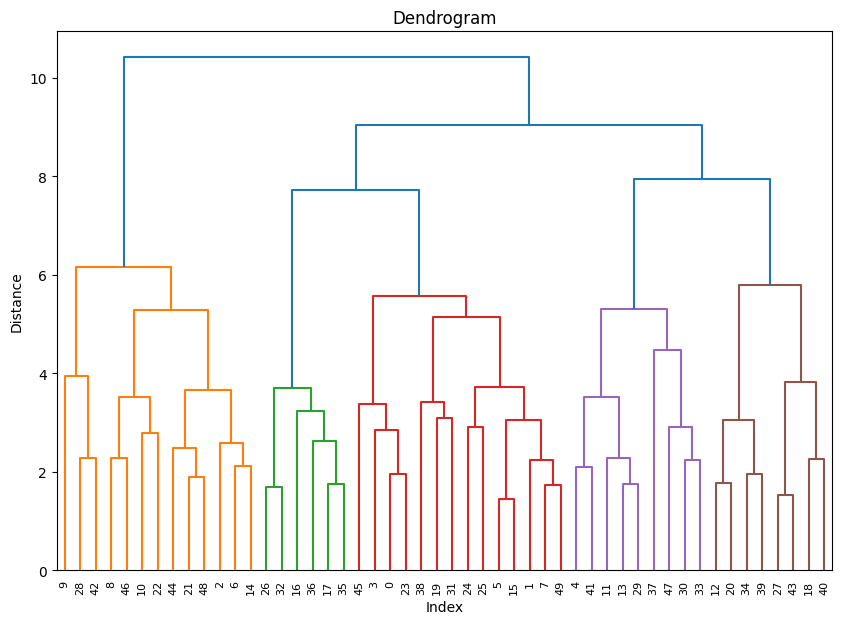

In [14]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

clusters = agg_clustering.fit_predict(tones_scaled)
linked = linkage(tones_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df.index, distance_sort='ascending')
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [15]:
# Calculate cophenetic correlation coefficient
c, coph_dists = cophenet(linked, pdist(tones_scaled))
print(f"Cophenetic Correlation Coefficient: {c}")


Cophenetic Correlation Coefficient: 0.5007466560415824


In [16]:
agg_df = demographics.copy()

In [17]:
agg_df['Cluster'] = clusters

In [18]:
clusters

array([0, 0, 1, 0, 3, 0, 1, 0, 1, 1, 1, 3, 2, 3, 1, 0, 0, 0, 2, 0, 2, 1,
       1, 0, 0, 0, 0, 2, 1, 3, 3, 0, 0, 3, 2, 0, 0, 3, 0, 2, 2, 3, 1, 2,
       1, 0, 1, 3, 1, 0], dtype=int64)

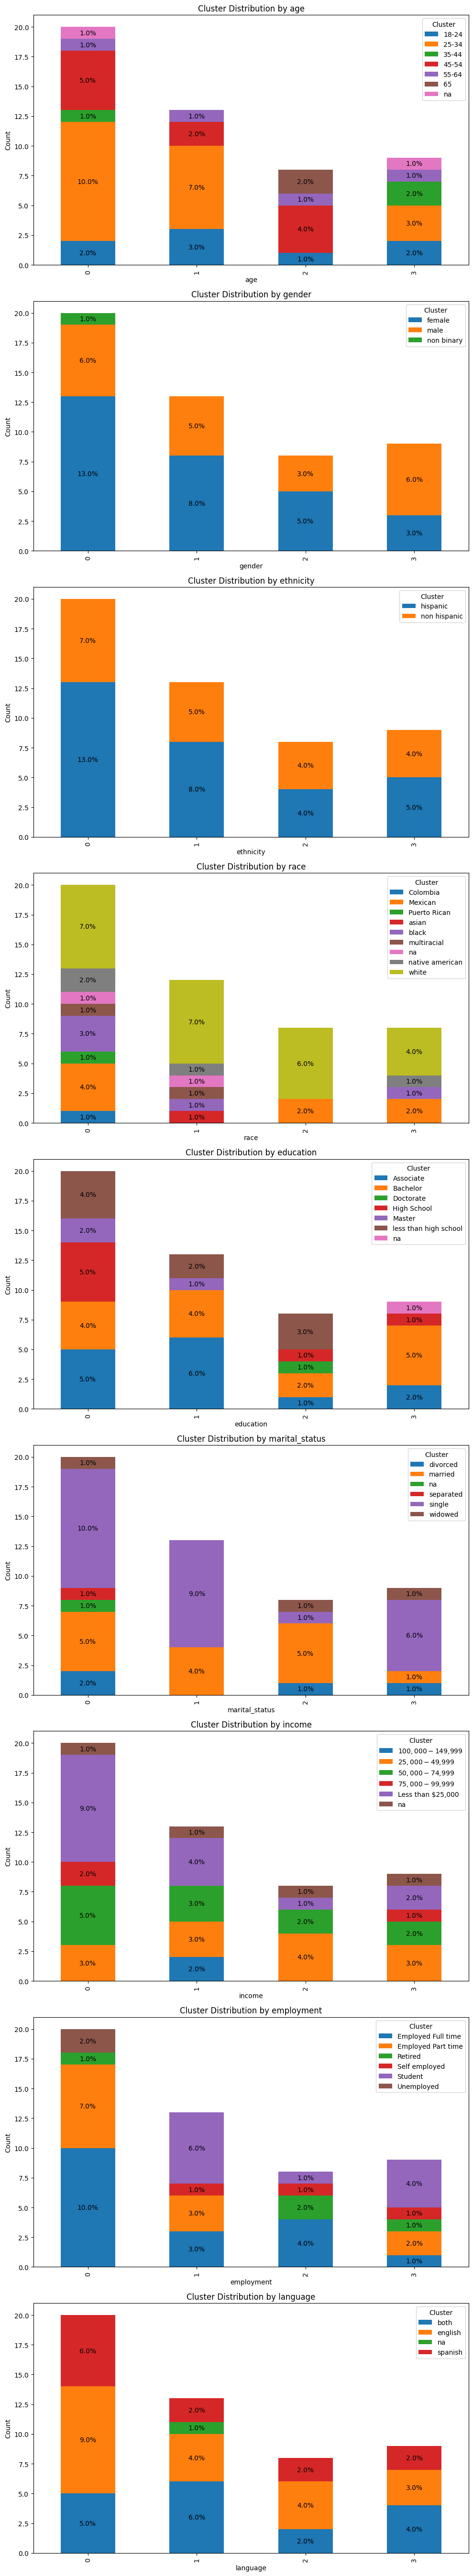

In [19]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = agg_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')
    plt.savefig((f'agg/{attribute}_cluster_distribution.png'))

plt.tight_layout()
plt.show()


In [20]:
agg_choices = tones_text.copy()
agg_choices['Cluster'] = clusters

In [21]:
agg_choices.head(2)

sample_1  sample_2    sample_3    sample_4  sample_5  sample_6  \
0  Persuasive  Simplier  Empathetic  Persuasive  Original  Original   
1    Original  Simplier  Empathetic    Simplier  Simplier  Original   

     sample_7    sample_8  Cluster  
0  Persuasive    Original        0  
1    Original  Persuasive        0

In [22]:
X = tones_scaled

# Define parameters to tune
linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'manhattan', 'cosine']
n_clusters_range = range(2, 50)  # Adjust based on your dataset and requirements

# Lists to store results
best_silhouette_score = -1
best_params = {}


# Perform parameter tuning
for linkage in linkage_methods:
    for affinity in affinity_metrics:
        # Skip combinations that are incompatible
        if (linkage == 'ward' and affinity != 'euclidean'):
            continue
        
        for n_clusters in n_clusters_range:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=affinity)
            cluster_labels = model.fit_predict(X)
            silhouette_avg = silhouette_score(X, cluster_labels)
            
            # Track the best parameters based on silhouette score
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_params = {'linkage': linkage, 'affinity': affinity, 'n_clusters': n_clusters}

# Output the best parameters found
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best Parameters: {'linkage': 'ward', 'affinity': 'euclidean', 'n_clusters': 12}
Best Silhouette Score: 0.1720398158042563


### K Modes -----

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 237.0
Run 1, iteration: 2/100, moves: 2, cost: 237.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 238.0
Run 2, iteration: 2/100, moves: 5, cost: 233.0
Run 2, iteration: 3/100, moves: 2, cost: 233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7, cost: 240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13, cost: 235.0
Run 4, iteration: 2/100, moves: 1, cost: 235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8, cost: 236.0
Run 5, iteration: 2/100, moves: 1, cost: 236.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mo

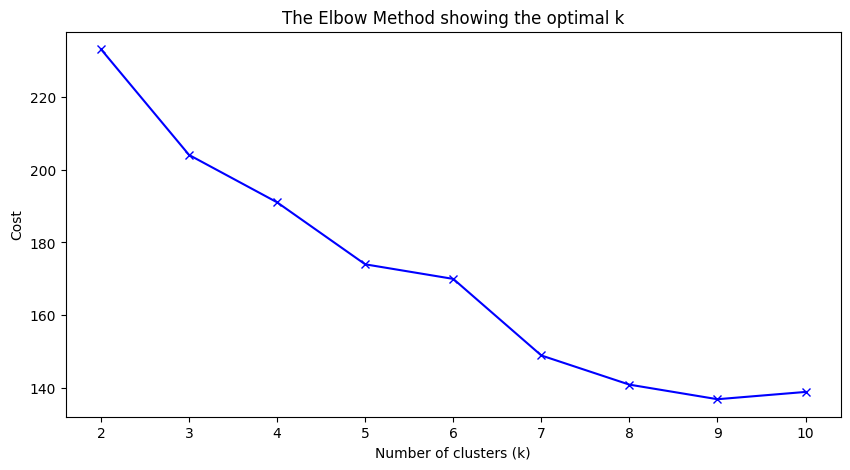

In [23]:
# Elbow method and silhouette scores for KModes
cost = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
    clusters = kmodes.fit_predict(tones)
    cost.append(kmodes.cost_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [24]:
# Create an instance of KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=50, max_iter=500)

# Fit the KMeans model to the tones_encoded dataset
kmeans.fit(tones_encoded)

KMeans(max_iter=500, n_clusters=6, n_init=50, random_state=42)

## <a id='toc1_3_'></a>[Dimensionality Reduction](#toc0_)

## PCA-----

In [25]:
pca = PCA(n_components=2)
tones_pca = pca.fit_transform(tones_encoded)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

### Elbow Method

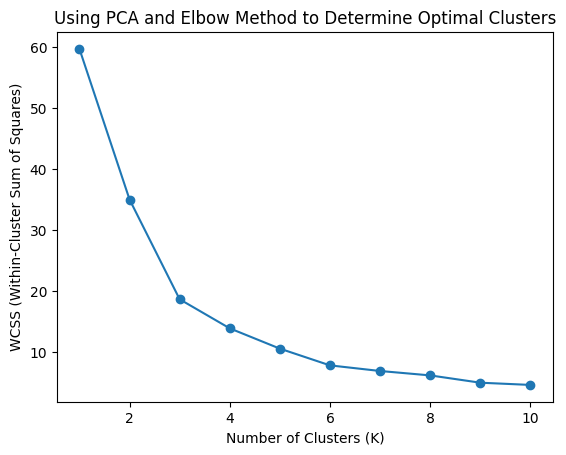

In [26]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(tones_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### Silhouette Score

For n_clusters = 2, the average silhouette score is: 0.39014914696552744
For n_clusters = 3, the average silhouette score is: 0.42596473322620443
For n_clusters = 4, the average silhouette score is: 0.41251521047405615
For n_clusters = 5, the average silhouette score is: 0.4071825217421693


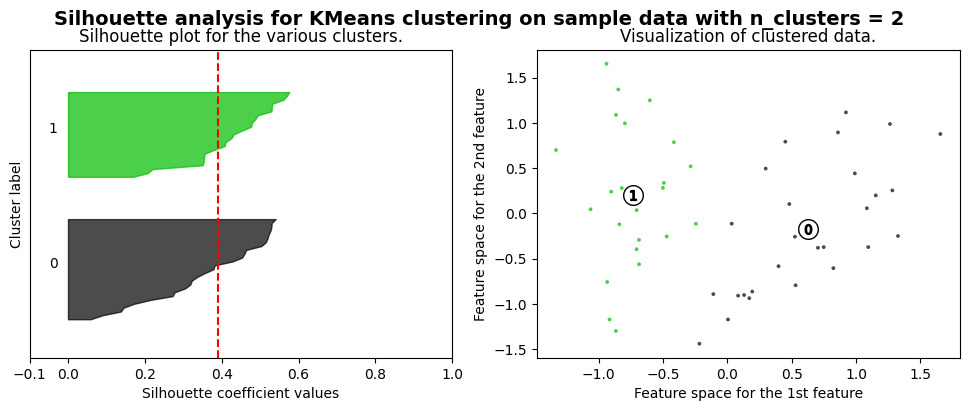

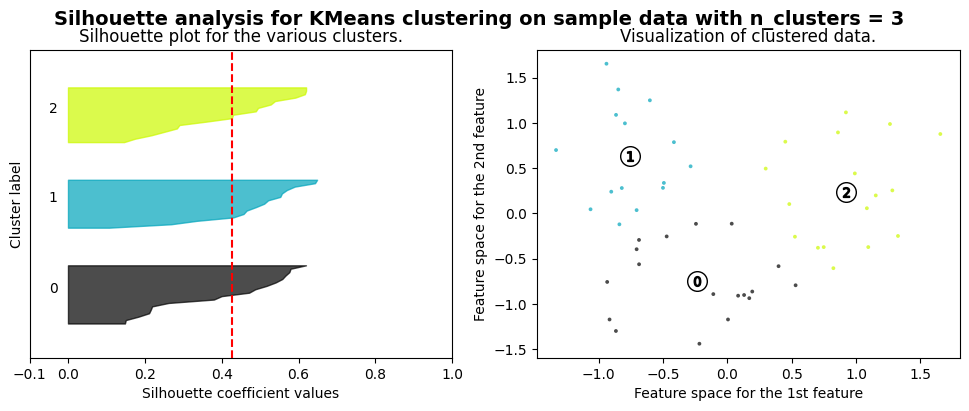

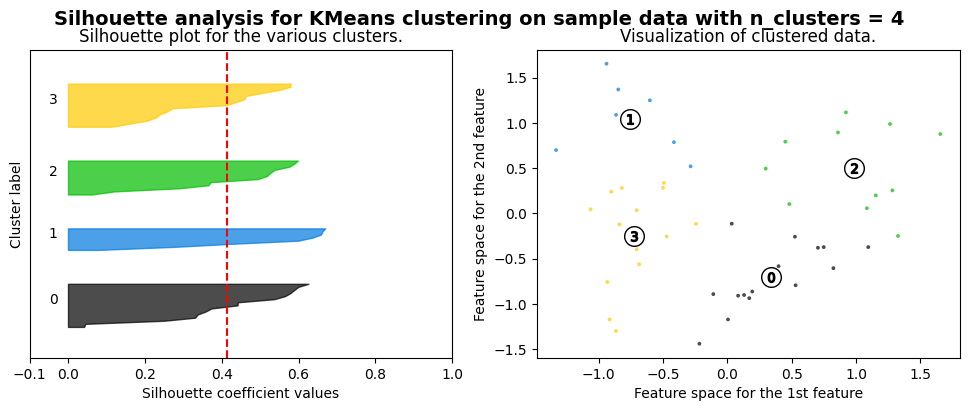

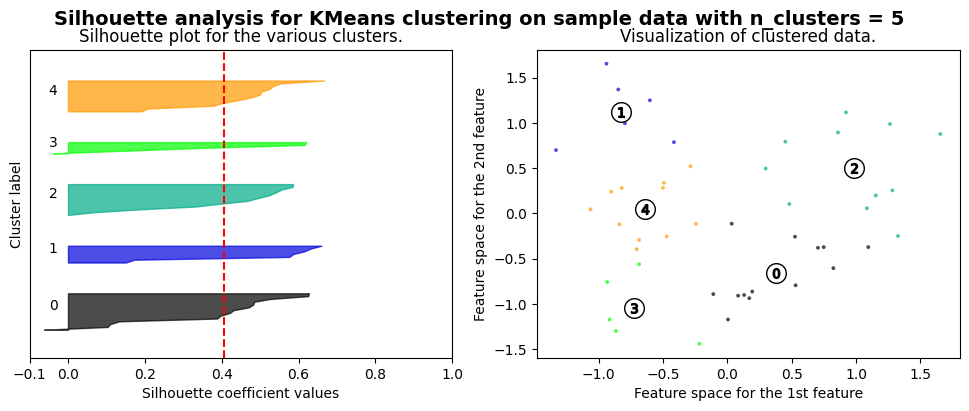

In [27]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(tones_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(tones_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(tones_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tones_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tones_pca[:, 0], tones_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

### Initialization

In [28]:
# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=3, n_init='auto')
cluster_labels_pca = kmeans.fit_predict(tones_pca)
# look at correlation between people and tone preferences

In [29]:
silhouette_avg = silhouette_score(tones_pca, cluster_labels_pca)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.42596473322620443


In [30]:
ch_score = calinski_harabasz_score(tones_pca, cluster_labels_pca)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 51.79261443246217


In [31]:
db_score = davies_bouldin_score(tones_pca, cluster_labels_pca)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.7738010404253597


### Data Points in clusters

In [32]:
unique, counts = np.unique(cluster_labels_pca, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 15, 1: 17, 2: 18}


### Visualizing Clusters

In [33]:
cluster_labels_pca

array([0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1,
       1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 0])

In [34]:
pca_df = demographics.copy()

In [35]:
pca_df['Cluster'] = cluster_labels_pca

In [36]:
pca_df.head(5)

age  gender     ethnicity             race    education marital_status  \
0  45-54  female  non hispanic  native american  High School             na   
1  18-24    male      hispanic            white  High School         single   
2  25-34  female  non hispanic      multiracial    Associate         single   
3  25-34  female      hispanic               na    Associate         single   
4  18-24    male      hispanic  native american     Bachelor         single   

              income          employment language                  disability  \
0  $25,000 - $49,999  Employed Part time     both  i do not have a disability   
1  Less than $25,000  Employed Part time  english  i do not have a disability   
2  Less than $25,000             Student  english  i do not have a disability   
3  Less than $25,000  Employed Part time     both  i do not have a disability   
4  $25,000 - $49,999             Student     both                          na   

     states  Cluster  
0   indiana        0  
1  illinois        0  
2  new York        1  
3  illinois        2  
4  illinois        2

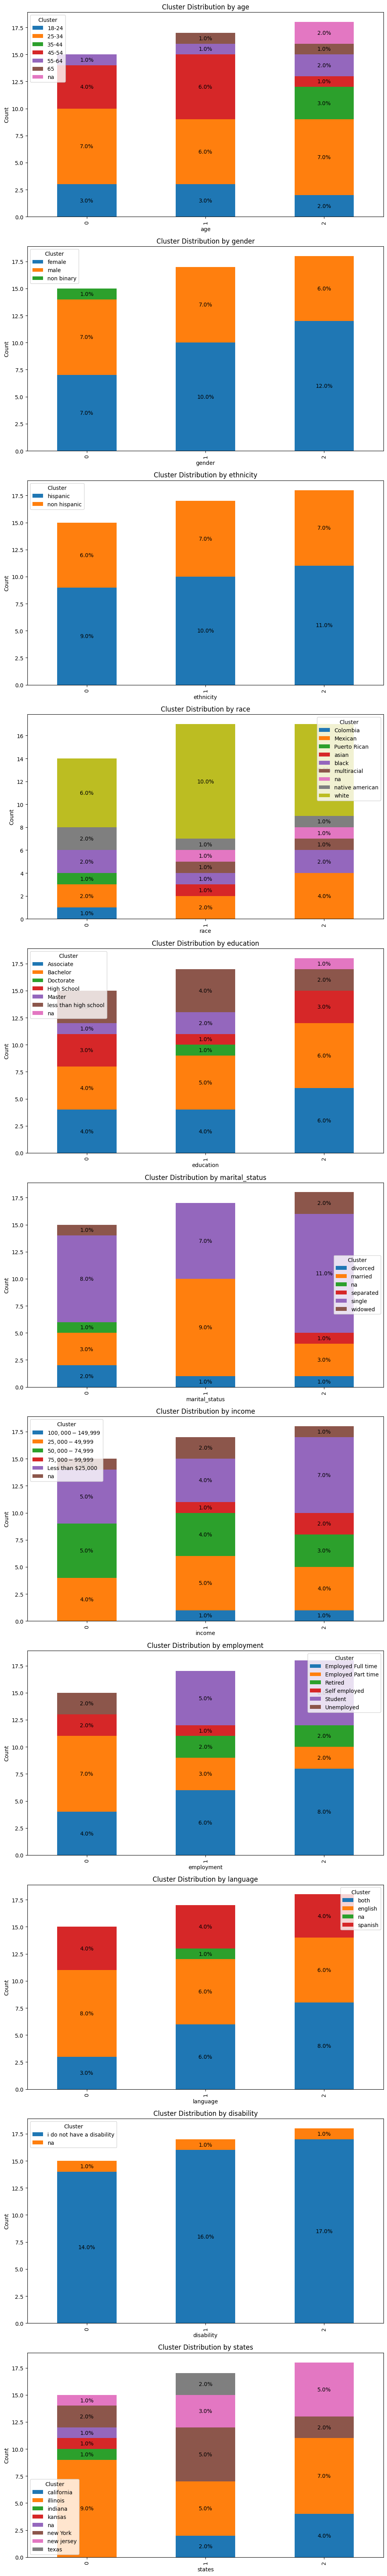

In [37]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = pca_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')
    plt.savefig((f'pca/{attribute}_cluster_distribution.png'))

plt.tight_layout()
plt.show()

### Bisecting KMeans

For n_clusters = 2, the average silhouette score is: 0.39014914696552744


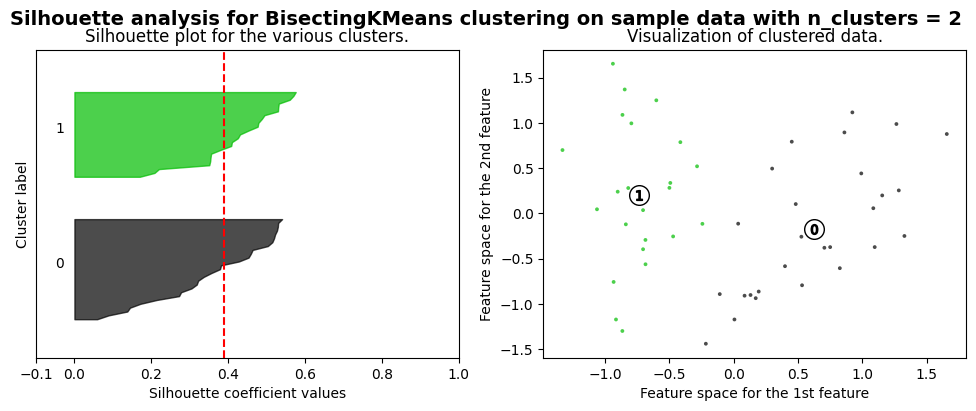

For n_clusters = 3, the average silhouette score is: 0.3894462800989903


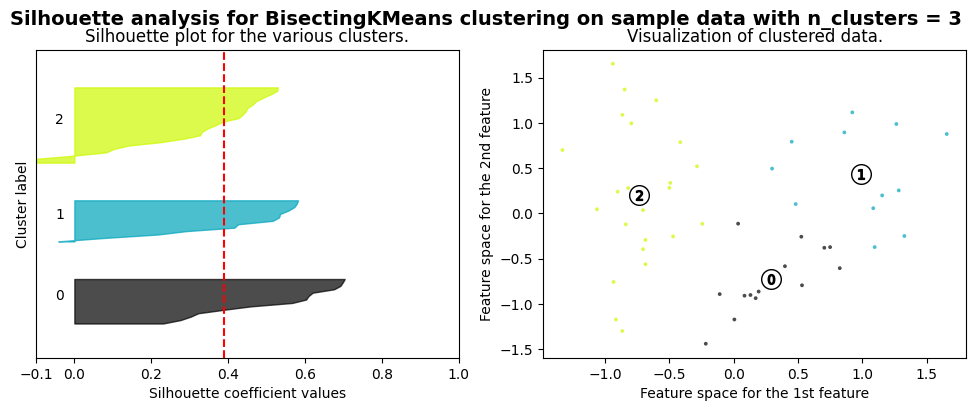

For n_clusters = 4, the average silhouette score is: 0.39876386673449155


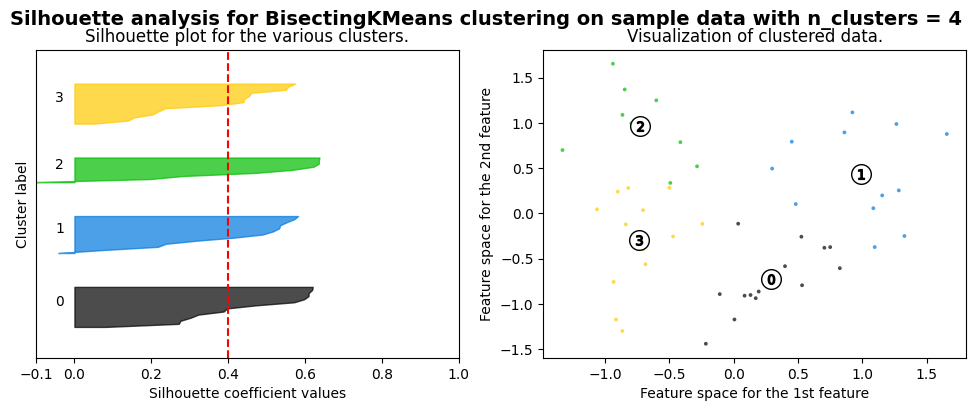

For n_clusters = 5, the average silhouette score is: 0.36044799145947587


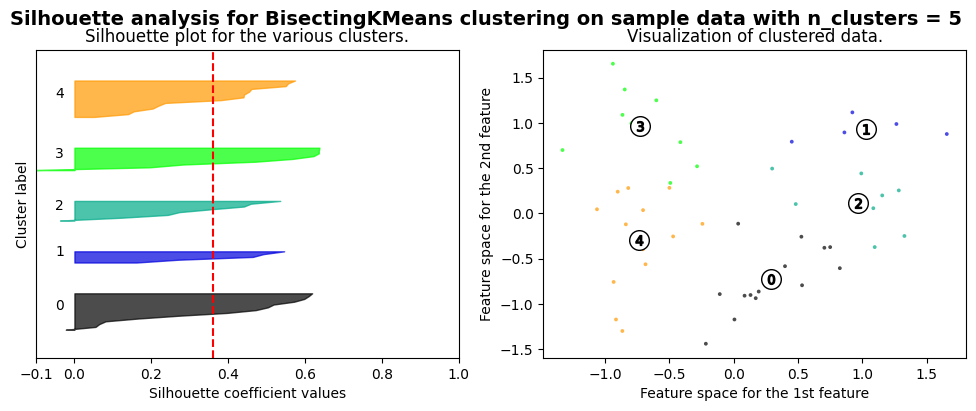

In [38]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Initialize Bisecting KMeans object and fit it to the data
    bisect_kmeans = BisectingKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = bisect_kmeans.fit_predict(tones_pca)
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(tones_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Calculate the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tones_pca, cluster_labels)

    # Plotting silhouette score
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(tones_pca) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tones_pca[:, 0], tones_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = bisect_kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for BisectingKMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

    plt.show()

### T-SNE Dimensionality Reduction-------

In [39]:
tsne = TSNE(n_components=2)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(tones_encoded) # type: ignore

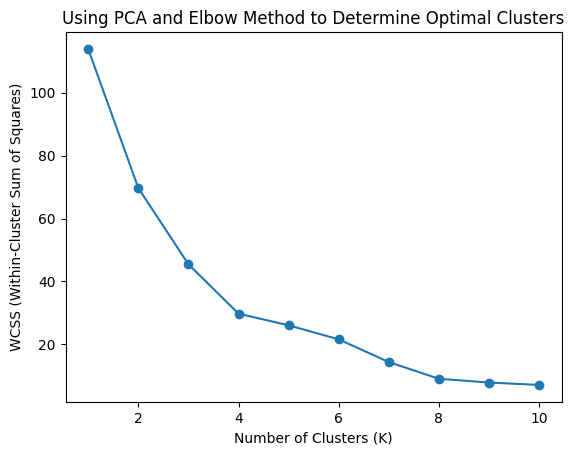

In [40]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.3406982719898224
For n_clusters = 3, the average silhouette score is: 0.36408740282058716
For n_clusters = 4, the average silhouette score is: 0.3753512501716614
For n_clusters = 5, the average silhouette score is: 0.33650675415992737


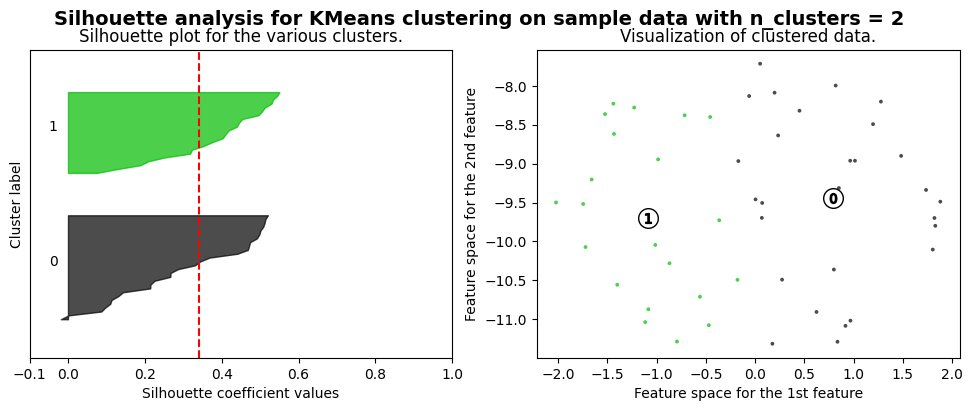

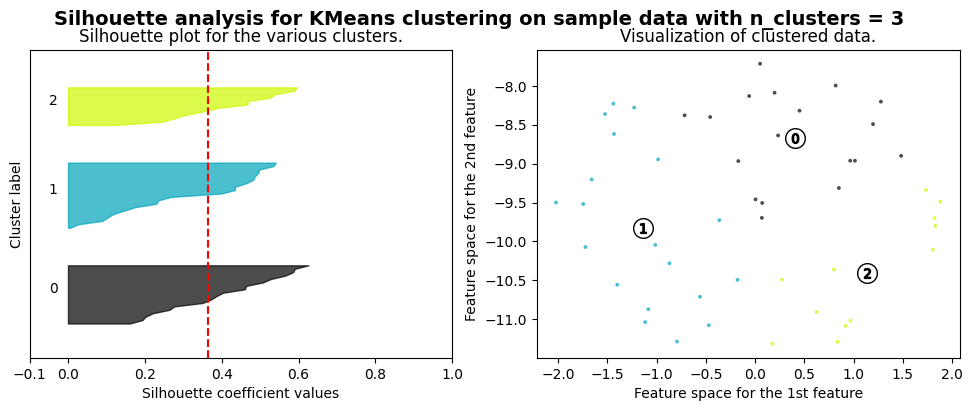

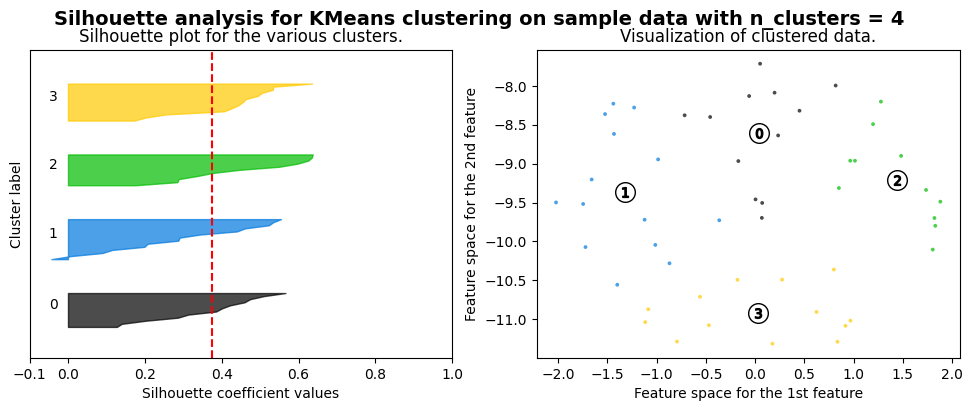

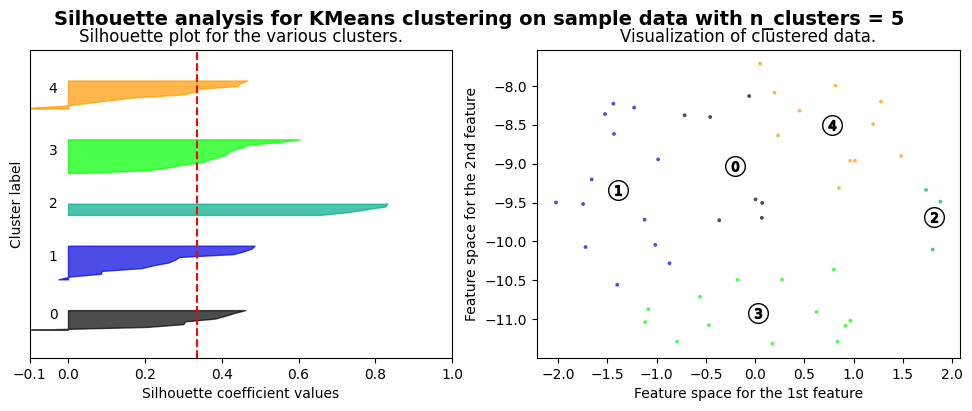

In [41]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_tsne)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

### Initialization

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels_tsne = kmeans.fit_predict(X_tsne)

In [43]:
silhouette_avg = silhouette_score(X_tsne, cluster_labels_tsne)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.3753512501716614


In [44]:
ch_score = calinski_harabasz_score(X_tsne, cluster_labels_tsne)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 43.32311125244275


In [45]:
db_score = davies_bouldin_score(X_tsne, cluster_labels_tsne)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.8827602094925942


### Data Points in Clusters

In [46]:
unique, counts = np.unique(cluster_labels_tsne, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 12, 1: 14, 2: 11, 3: 13}


### Visualing Clusters

In [47]:
tsne_df = demographics.copy()

In [48]:
tsne_df['Cluster'] = cluster_labels_tsne

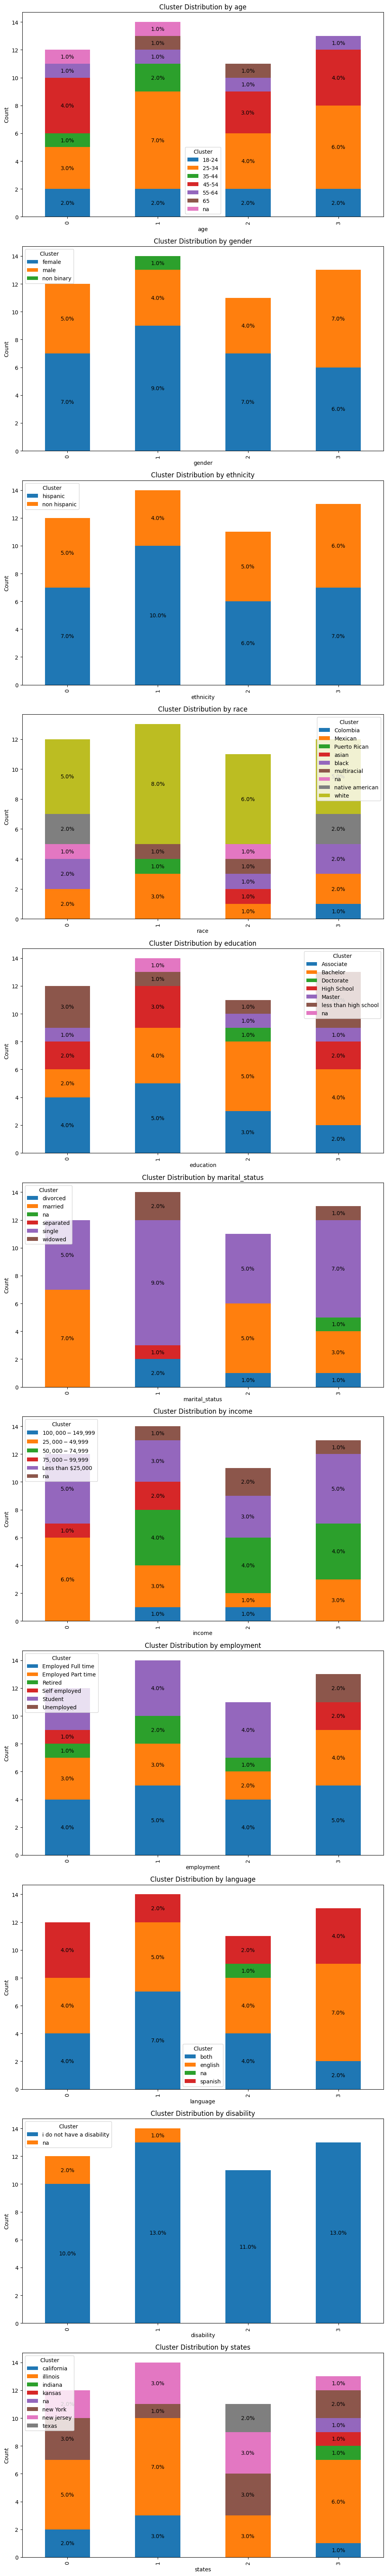

In [49]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = tsne_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')

plt.tight_layout()
plt.show()

### UMAP Dimensionality Reduction ----

In [50]:
umap_model = umap.UMAP(n_components=2)  # Reduce to 2 dimensions
X_umap = umap_model.fit_transform(tones_encoded)

For n_clusters = 2, the average silhouette score is: 0.3518122136592865
For n_clusters = 3, the average silhouette score is: 0.3959687352180481
For n_clusters = 4, the average silhouette score is: 0.42547348141670227
For n_clusters = 5, the average silhouette score is: 0.3941120207309723
For n_clusters = 6, the average silhouette score is: 0.32873886823654175
For n_clusters = 7, the average silhouette score is: 0.32622048258781433
For n_clusters = 8, the average silhouette score is: 0.3671227693557739


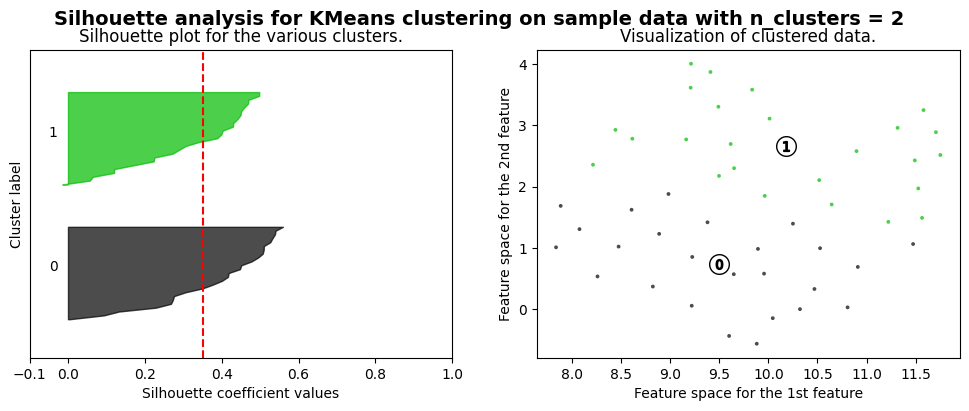

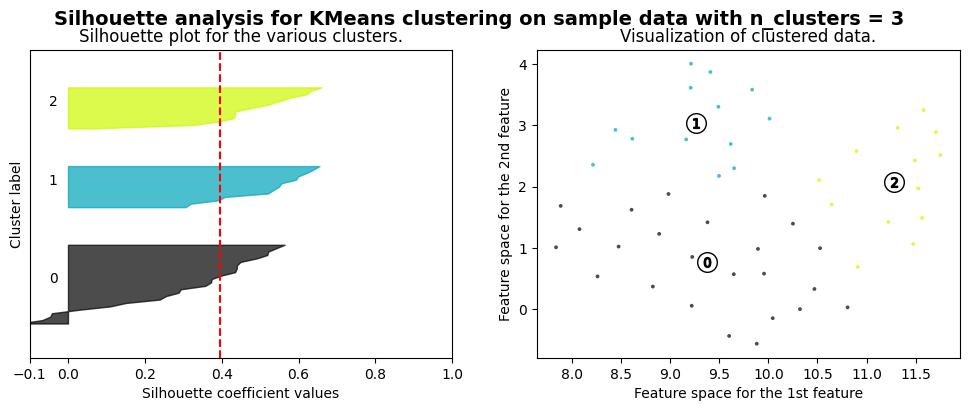

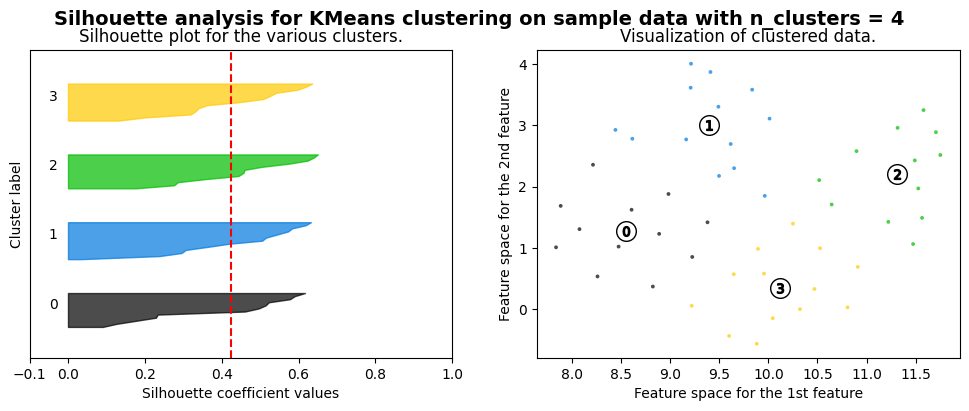

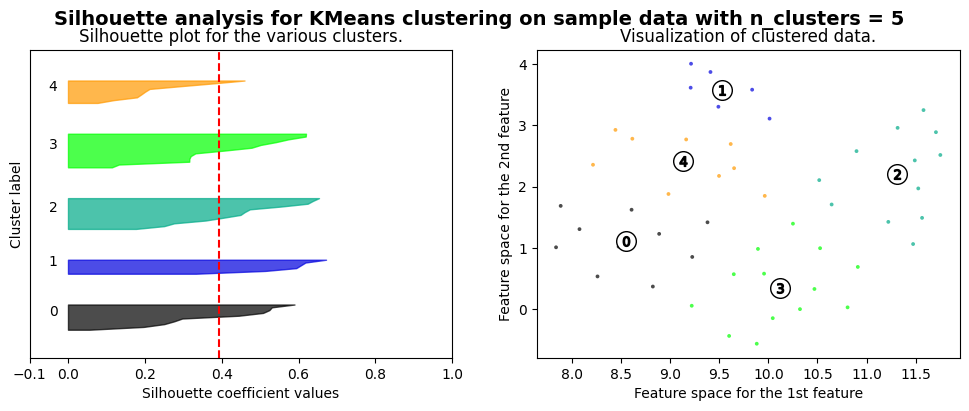

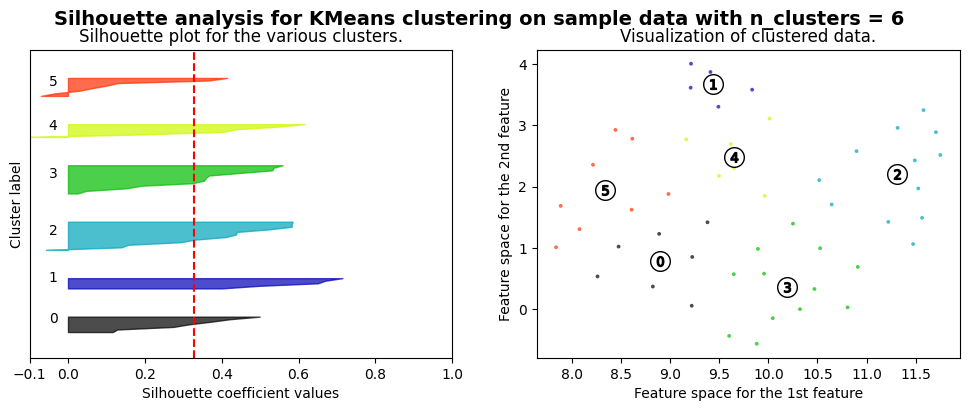

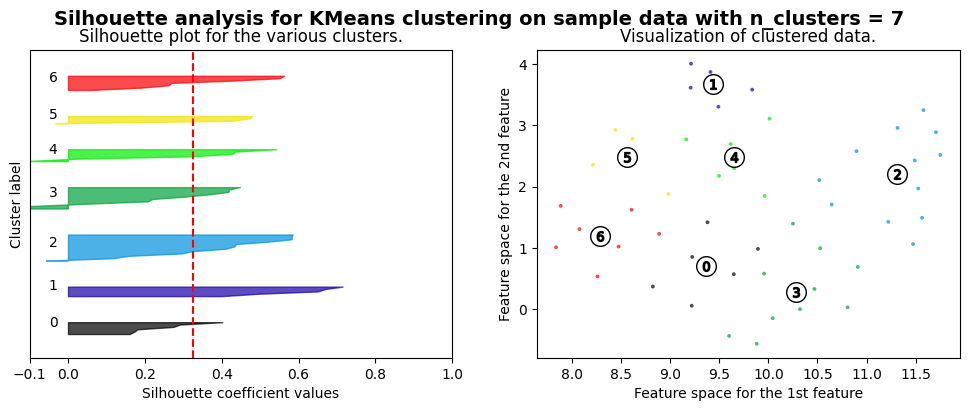

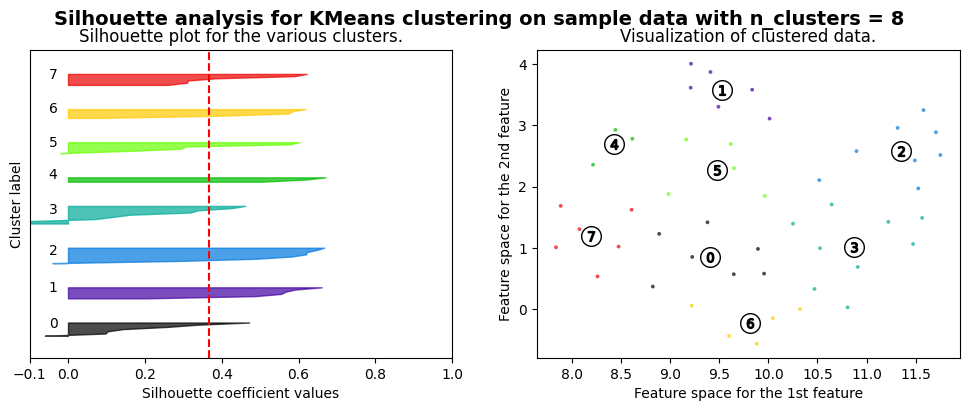

In [51]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_umap) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_umap)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_umap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_umap[:, 0], X_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels_umap = kmeans.fit_predict(X_umap)

In [53]:
silhouette_avg = silhouette_score(X_umap, cluster_labels_umap)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.42547348141670227


In [54]:
ch_score = calinski_harabasz_score(X_umap, cluster_labels_umap)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 54.13625347226255


In [55]:
db_score = davies_bouldin_score(X_umap, cluster_labels_umap)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.7391363147094808


### Factor Analysis Dimensionality Reduction ----

In [56]:
fa = FactorAnalysis(n_components=2, tol=1e-5, random_state=42)  # Reduce to 2 dimensions
X_fa = fa.fit_transform(tones_encoded) # type: ignore

#### K-Means

For n_clusters = 2, the average silhouette score is: 0.532507440032315
For n_clusters = 3, the average silhouette score is: 0.6107319720502148
For n_clusters = 4, the average silhouette score is: 0.6880361346704852
For n_clusters = 5, the average silhouette score is: 0.6191577428245006
For n_clusters = 6, the average silhouette score is: 0.6173006894094728
For n_clusters = 7, the average silhouette score is: 0.5526988264138112
For n_clusters = 8, the average silhouette score is: 0.48921717926403924


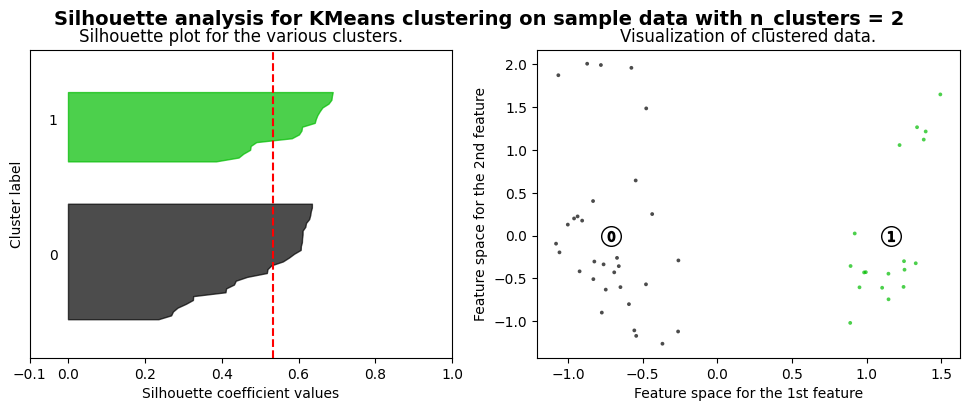

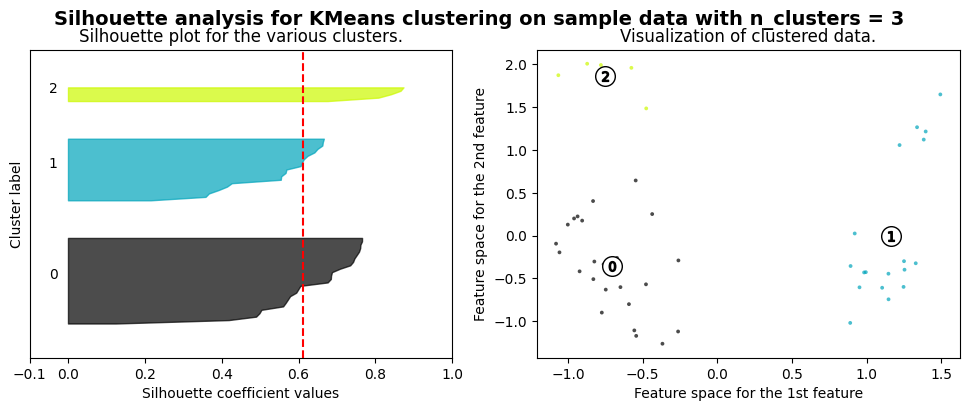

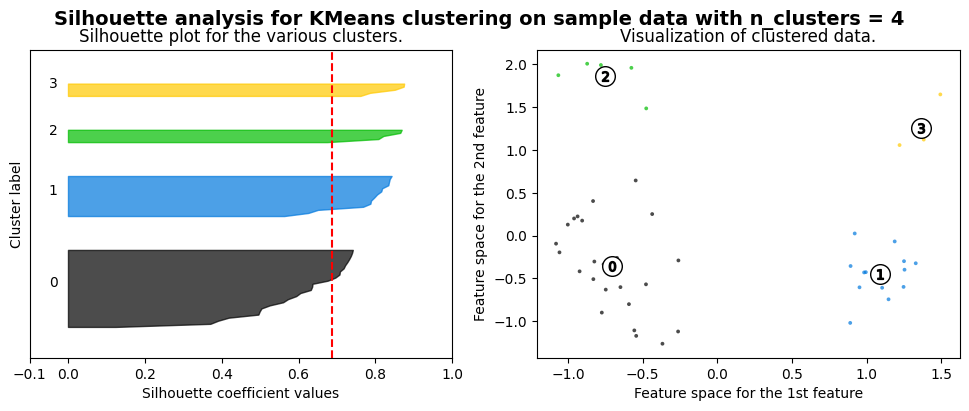

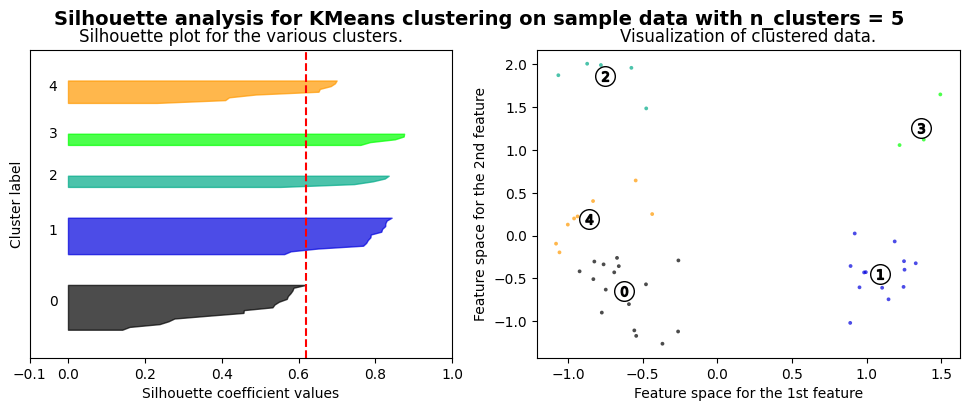

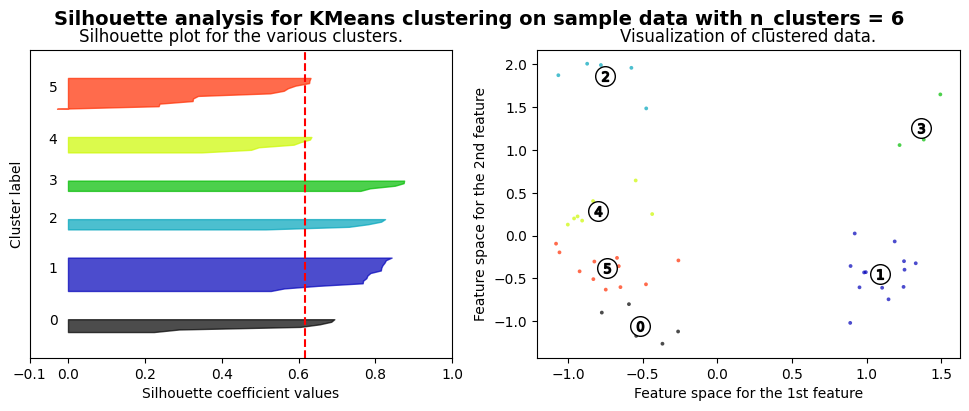

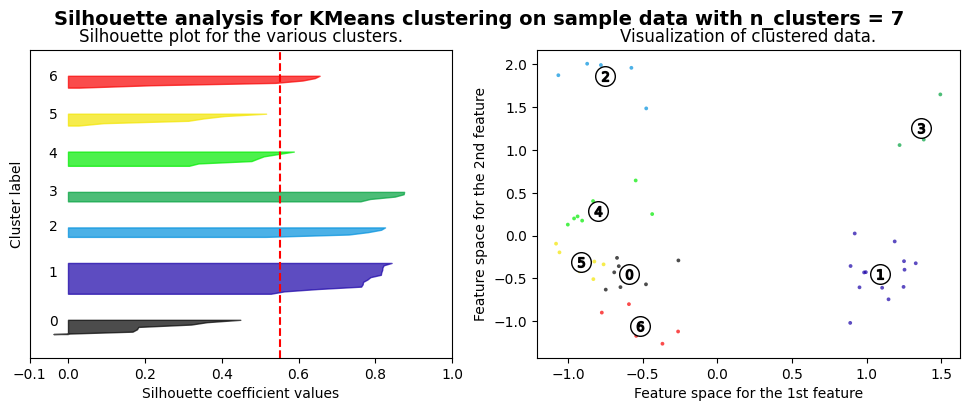

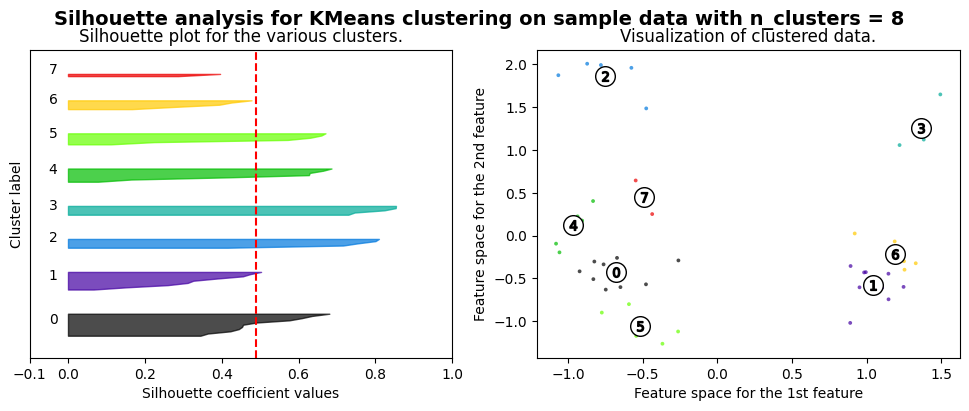

In [57]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_fa) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_fa)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_fa, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_fa, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_fa[:, 0], X_fa[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

##### Initialization

In [58]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto', algorithm='lloyd')
cluster_labels_fa = kmeans.fit_predict(X_fa)

In [60]:
fa_demo = demographics.copy()
fa_demo['Cluster'] = cluster_labels_fa
fa_demo.to_excel('fa_demo.xlsx', index=False)

##### Factorability

Factorabilty is one of the most important assumptions for FA. There are 3 ways of assessing factorability. 

In [ ]:
correlation_matrix = tones_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Check if there are any correlations > 0.3
correlations_above_threshold = (correlation_matrix.abs() > 0.3).sum().sum()
print(f'There are {correlations_above_threshold} correlations above 0.3.')

NameError: name 'sns' is not defined

<Figure size 1200x1000 with 0 Axes>

In [ ]:
pip install factor-analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ---------------------------- ----------- 30.7/42.8 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ - 41.0/42.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 346.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=a3725fe2051b6921eec190f9cf1009d36cec75004a7ca6187c519141f23b1b8d
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\24\59\82\6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer
Note: you may need to 


[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
tones.head(1)

sample_1 sample_2 sample_3 sample_4 sample_5 sample_6 sample_7 sample_8
0        2        3        0        2        1        1        2        1

In [ ]:
from scipy.stats import bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Perform Bartlett’s Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(tones_encoded)
print(f'Chi-Square Value: {chi_square_value}, p-value: {p_value}')

Chi-Square Value: 6.6742493524847735, p-value: 0.08303811675131517


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Calculate KMO measure
kmo_all, kmo_model = calculate_kmo(tones_encoded)
print("KMO Measure:")
print(kmo_model)


KMO Measure:
0.49499125079668954


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Compute KMO for the original dataset
kmo_all, kmo_model = calculate_kmo(tones_encoded)
print(f'Overall KMO = {kmo_model:.3f}')

# Select only adequate variables and recompute KMO
kmo_passed = list(tones_encoded.columns[kmo_all >= 0.5])
tones_encoded_kmo = tones_encoded[kmo_passed]
kmo_all, kmo_model = calculate_kmo(tones_encoded_kmo)
print(f'Overall KMO after filtering = {kmo_model:.3f}')

# Update the dataset
tones_encoded = tones_encoded_kmo.copy()

Overall KMO = 0.327
Overall KMO after filtering = 0.495


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\factor_analyzer\utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



##### Metrics

In [ ]:
silhouette_avg = silhouette_score(X_fa, cluster_labels_fa)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.6880361346704852


In [ ]:
ch_score = calinski_harabasz_score(X_fa, cluster_labels_fa)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 115.21991923184895


In [ ]:
db_score = davies_bouldin_score(X_fa, cluster_labels_fa)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.34462500618693226


### Data points in clusters

In [ ]:
unique, counts = np.unique(cluster_labels_fa, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 26, 1: 14, 2: 5, 3: 5}


In [ ]:
cluster_labels_fa

array([1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 2,
       0, 1, 0, 0, 3, 0, 0, 1, 0, 1, 3, 0, 0, 3, 0, 1, 0, 0, 0, 1, 2, 0,
       2, 0, 3, 0, 2, 1])

In [ ]:
fa_df = demographics.copy()

In [ ]:
fa_df.head(3)

age  gender     ethnicity             race    education marital_status  \
0  45-54  female  non hispanic  native american  High School             na   
1  18-24    male      hispanic            white  High School         single   
2  25-34  female  non hispanic      multiracial    Associate         single   

              income          employment language                  disability  \
0  $25,000 - $49,999  Employed Part time     both  i do not have a disability   
1  Less than $25,000  Employed Part time  english  i do not have a disability   
2  Less than $25,000             Student  english  i do not have a disability   

     states  
0   indiana  
1  illinois  
2  new York

In [ ]:
fa_df['Cluster'] = cluster_labels_fa

In [ ]:
fa_df.head(15)

age      gender     ethnicity             race              education  \
0   45-54      female  non hispanic  native american            High School   
1   18-24        male      hispanic            white            High School   
2   25-34      female  non hispanic      multiracial              Associate   
3   25-34      female      hispanic               na              Associate   
4   18-24        male      hispanic  native american               Bachelor   
5   25-34      female  non hispanic            white                 Master   
6   18-24      female      hispanic            white              Associate   
7   25-34  non binary      hispanic    Puerto Rican               Associate   
8   25-34      female      hispanic               na               Bachelor   
9   25-34      female      hispanic              NaN              Associate   
10  18-24        male      hispanic            white  less than high school   
11  18-24      female      hispanic              NaN               Bachelor   
12  45-54        male      hispanic            white              Doctorate   
13  25-34      female      hispanic          Mexican              Associate   
14  25-34      female      hispanic  native american              Associate   

   marital_status               income          employment language  \
0              na    $25,000 - $49,999  Employed Part time     both   
1          single    Less than $25,000  Employed Part time  english   
2          single    Less than $25,000             Student  english   
3          single    Less than $25,000  Employed Part time     both   
4          single    $25,000 - $49,999             Student     both   
5         married    $50,000 - $74,999  Employed Part time  english   
6          single                   na             Student     both   
7        divorced    $50,000 - $74,999  Employed Part time     both   
8          single    Less than $25,000             Student     both   
9          single  $100,000 - $149,999             Student     both   
10         single    Less than $25,000  Employed Part time  english   
11         single    Less than $25,000  Employed Part time  spanish   
12        married                   na  Employed Full time  english   
13         single    $25,000 - $49,999  Employed Part time     both   
14         single    $25,000 - $49,999             Student     both   

                    disability    states  Cluster  
0   i do not have a disability   indiana        1  
1   i do not have a disability  illinois        1  
2   i do not have a disability  new York        0  
3   i do not have a disability  illinois        0  
4                           na  illinois        0  
5   i do not have a disability  illinois        0  
6   i do not have a disability  illinois        2  
7                           na  illinois        1  
8   i do not have a disability  illinois        0  
9   i do not have a disability  illinois        0  
10  i do not have a disability  illinois        0  
11  i do not have a disability  illinois        1  
12  i do not have a disability  new York        0  
13  i do not have a disability  illinois        1  
14  i do not have a disability  illinois        0

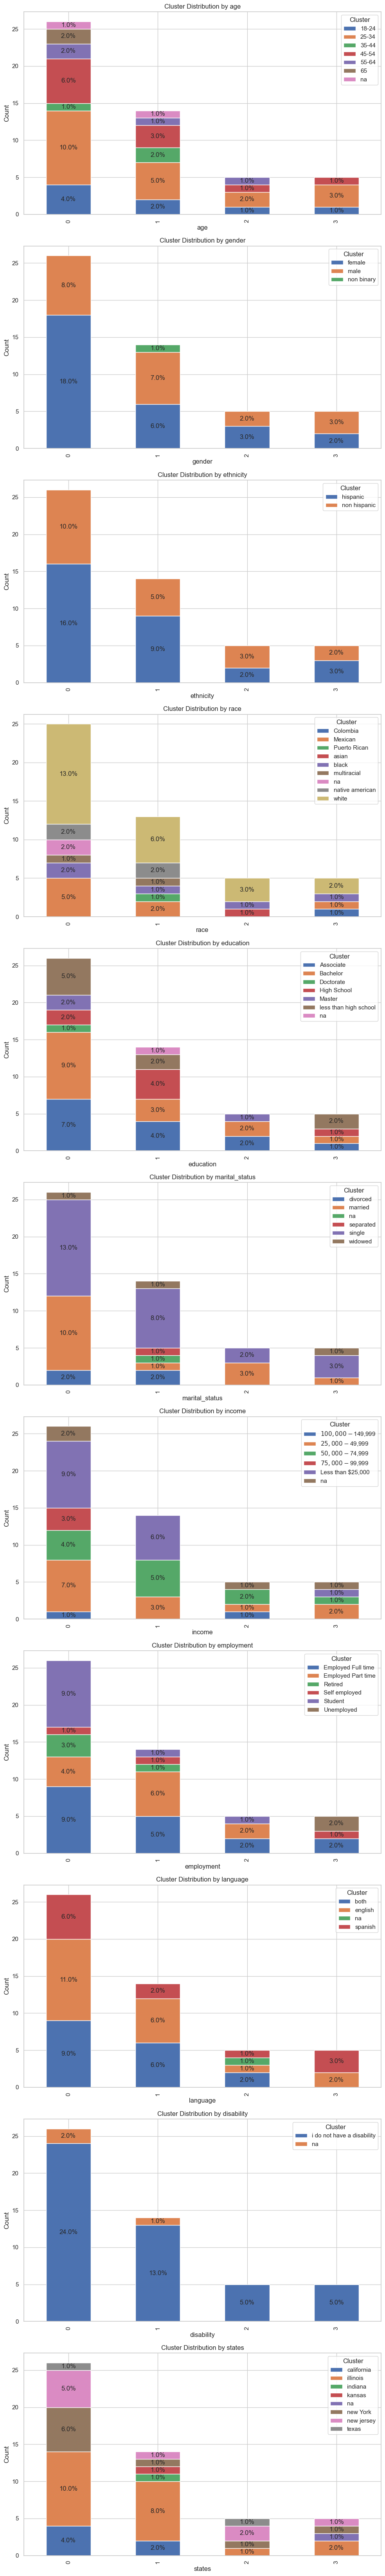

In [ ]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = fa_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')

plt.tight_layout()
plt.show()

### ISOMAP-----

In [ ]:
isomap = Isomap(n_components=2, n_neighbors=2)  # Reduce to 2 dimensions
X_isomap = isomap.fit_transform(tones_encoded)

For n_clusters = 2, the average silhouette score is: 0.5429946530571633
For n_clusters = 3, the average silhouette score is: 0.45124540510386146
For n_clusters = 4, the average silhouette score is: 0.46619008949250806
For n_clusters = 5, the average silhouette score is: 0.40797006539272457
For n_clusters = 6, the average silhouette score is: 0.40454899738023514
For n_clusters = 7, the average silhouette score is: 0.38213578981180396
For n_clusters = 8, the average silhouette score is: 0.3997493782350975


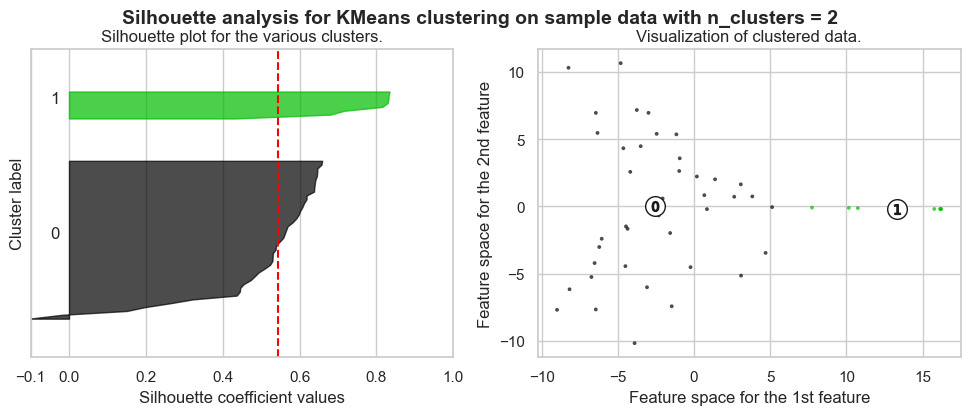

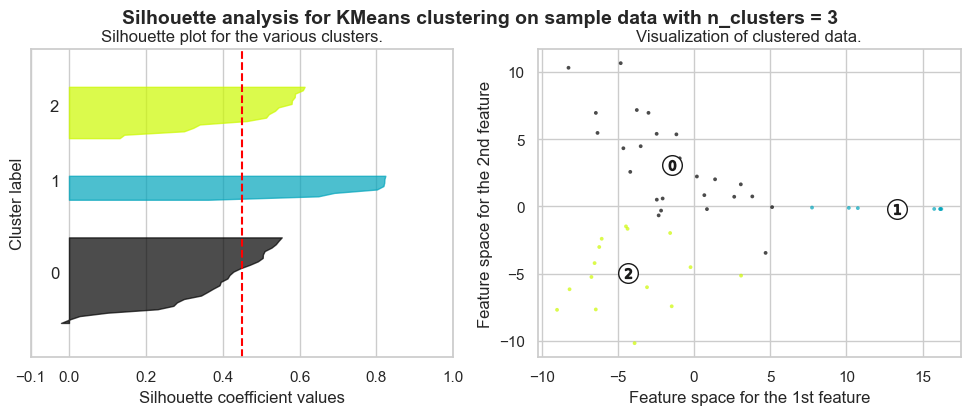

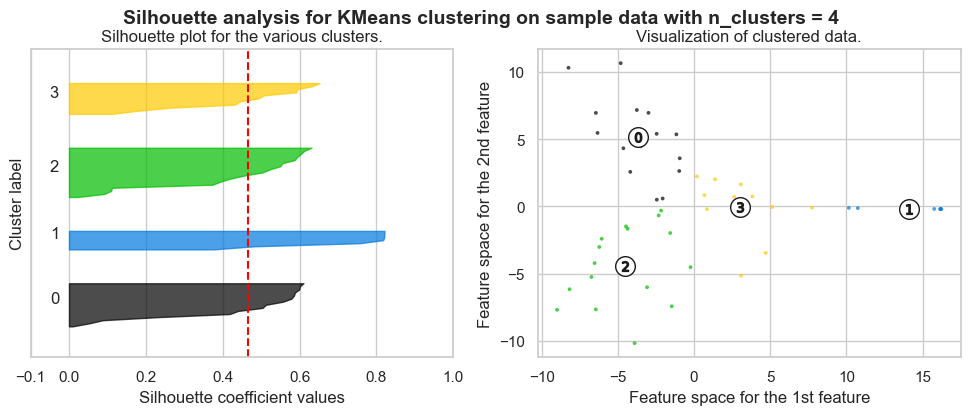

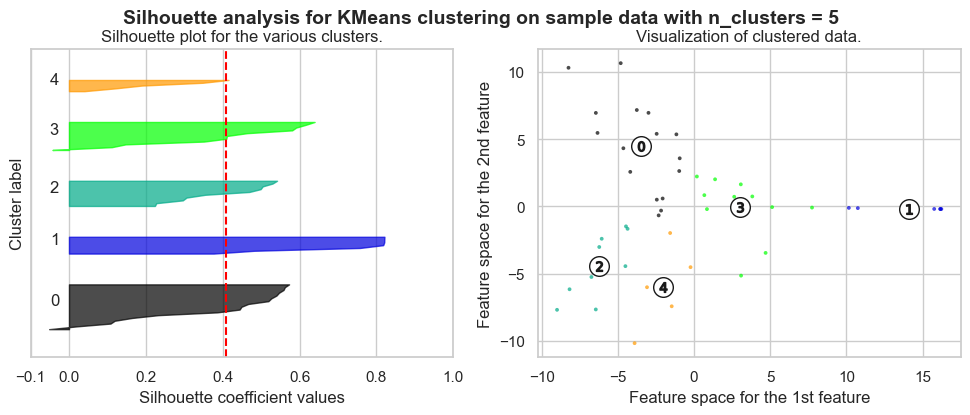

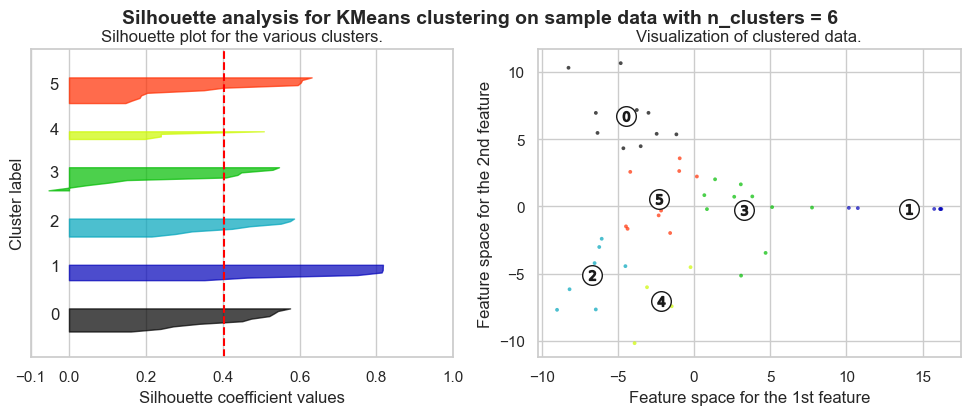

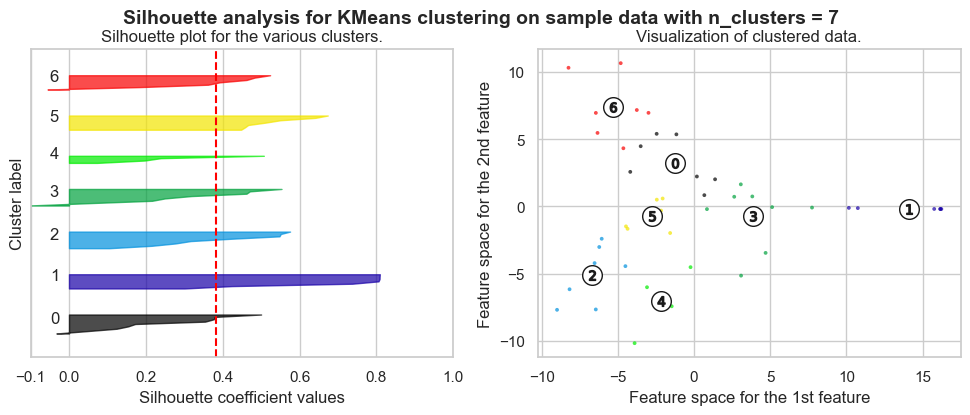

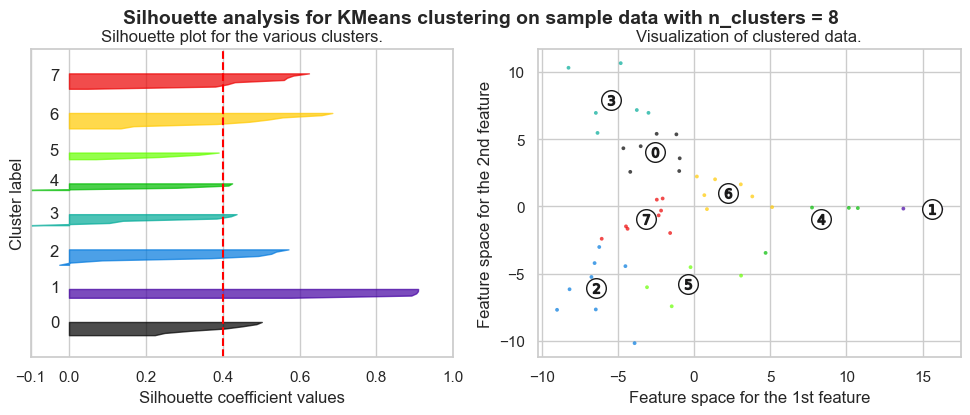

In [ ]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_isomap) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_isomap)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_isomap, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_isomap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

### Initialization

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels_iso = kmeans.fit_predict(X_isomap)

In [ ]:
silhouette_avg = silhouette_score(X_isomap, cluster_labels_iso)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.46619008949250806


In [ ]:
ch_score = calinski_harabasz_score(X_isomap, cluster_labels_iso)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 75.10045245406484


In [ ]:
db_score = davies_bouldin_score(X_isomap, cluster_labels_iso)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.6392431913872916


### Data Points in Clusters

In [ ]:
unique, counts = np.unique(cluster_labels_iso, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 15, 1: 7, 2: 17, 3: 11}


### Visualizing the Clusters

In [ ]:
isomap_df = demographics.copy()

In [ ]:
isomap_df['Cluster'] = cluster_labels_iso

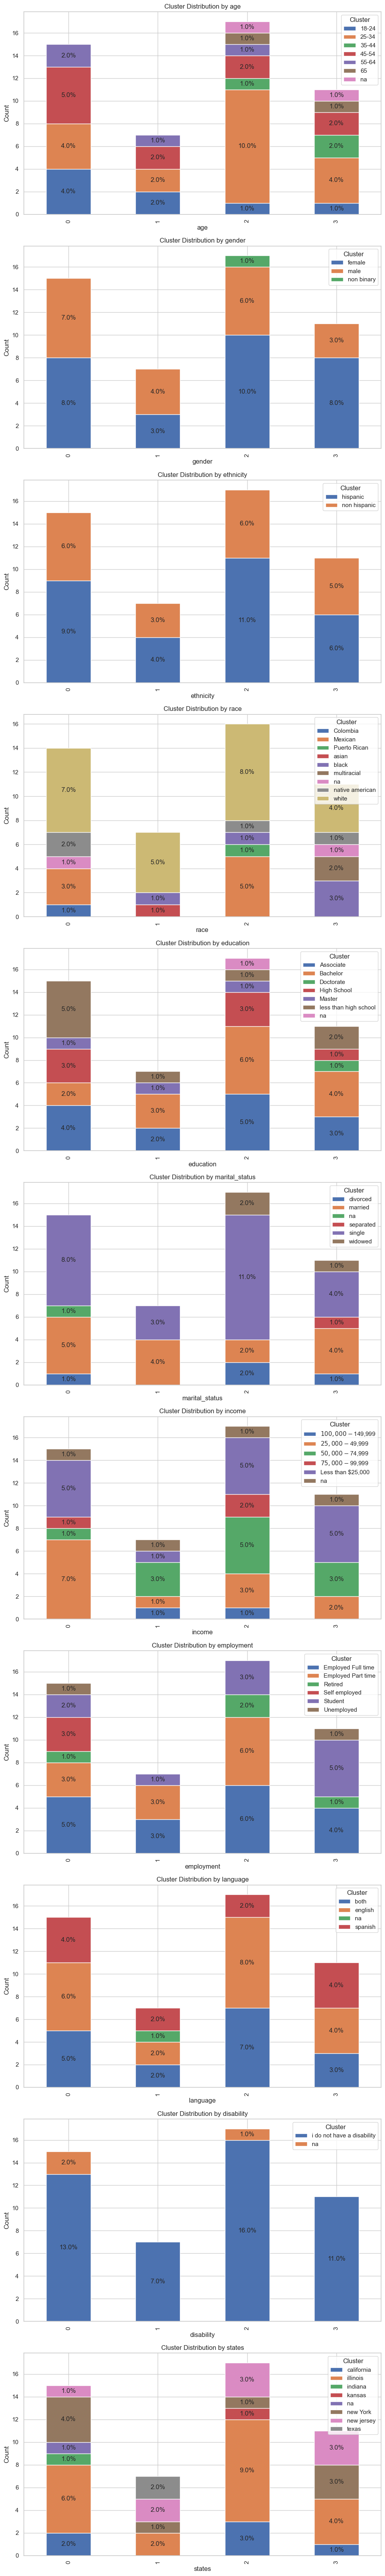

In [ ]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = isomap_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')

plt.tight_layout()
plt.show()


### Locally Linear Embedding (LLE)

In [ ]:
lle = LocallyLinearEmbedding(n_components=2)  # Reduce to 2 dimensions
X_lle = lle.fit_transform(tones_encoded)

For n_clusters = 2, the average silhouette score is: 0.39905112681501115
For n_clusters = 3, the average silhouette score is: 0.26889383271700706
For n_clusters = 4, the average silhouette score is: 0.4584049496400351
For n_clusters = 5, the average silhouette score is: 0.44487725998642746
For n_clusters = 6, the average silhouette score is: 0.44427750518531
For n_clusters = 7, the average silhouette score is: 0.42053929605241086
For n_clusters = 8, the average silhouette score is: 0.3861581063231007


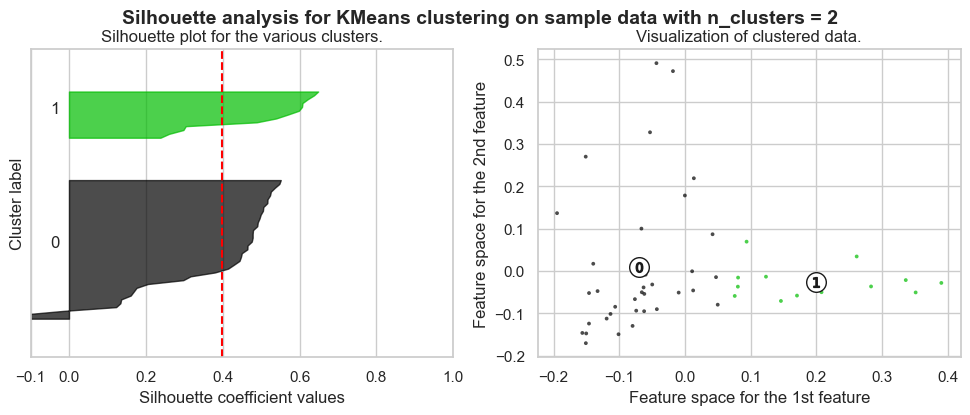

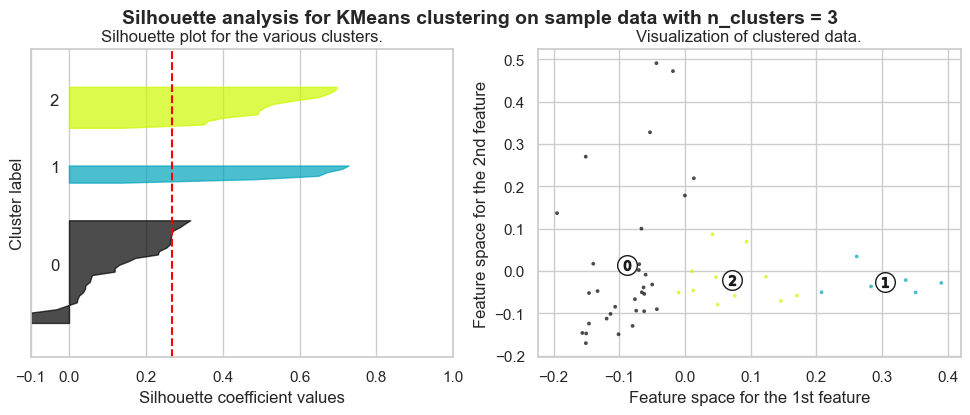

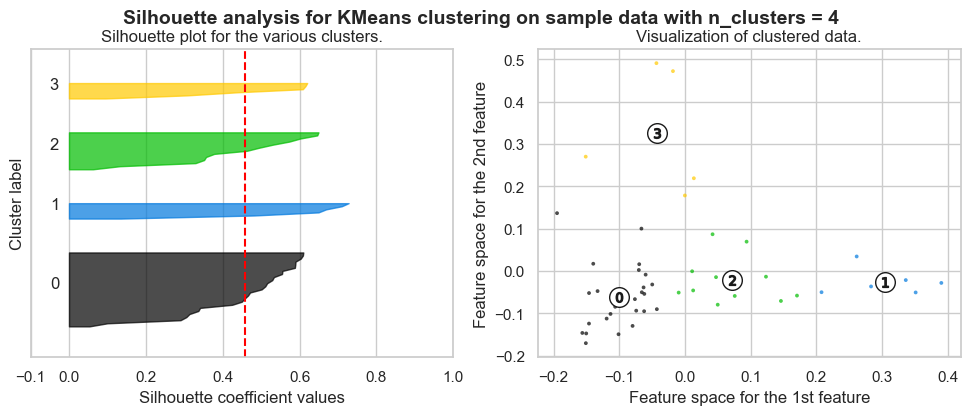

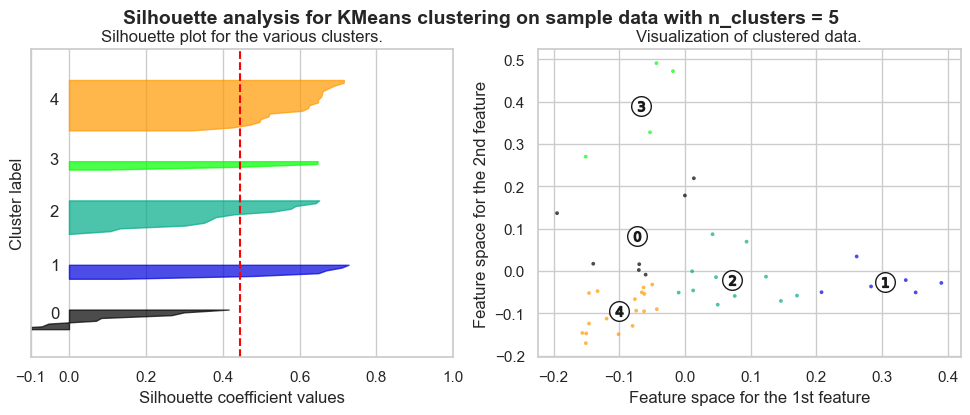

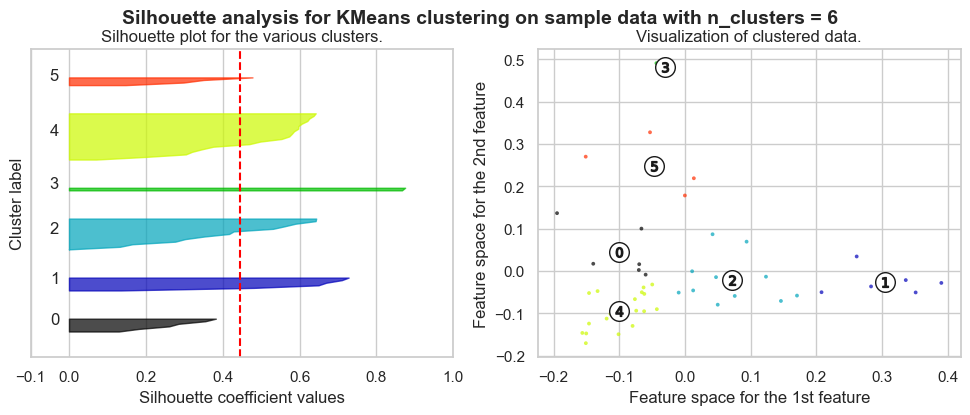

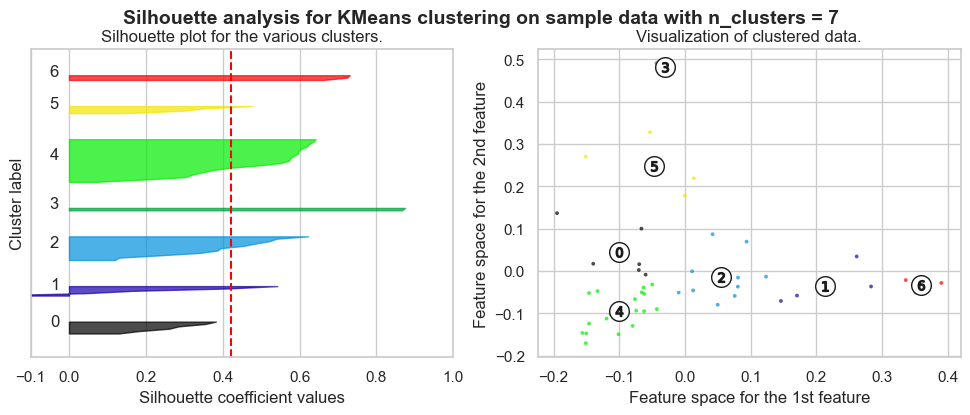

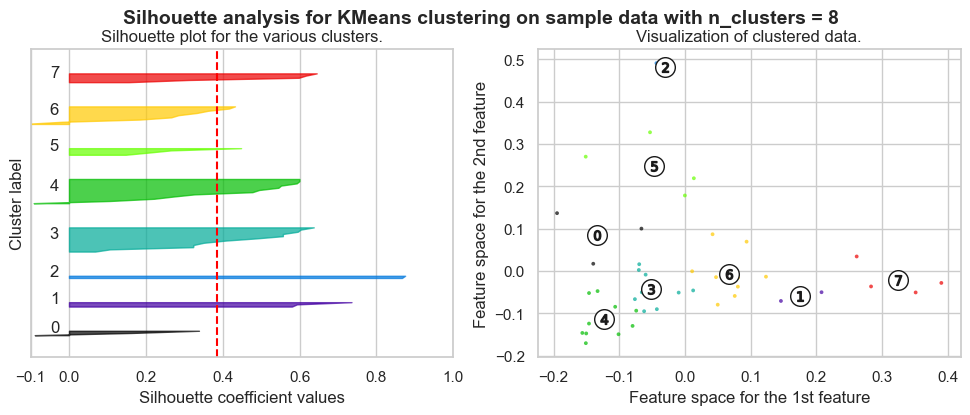

In [ ]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(X_lle) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_lle)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_lle, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_lle, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_lle[:, 0], X_lle[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    # plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels_lle = kmeans.fit_predict(X_lle)

In [ ]:
silhouette_avg = silhouette_score(X_lle, cluster_labels_lle)
print(f"For n_clusters = {4}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 4, the average silhouette score is: 0.4584049496400351


In [ ]:
ch_score = calinski_harabasz_score(X_lle, cluster_labels_lle)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 66.73348874908785


In [ ]:
db_score = davies_bouldin_score(X_lle, cluster_labels_lle)
print(f'Davies-Bouldin Index: {db_score}')

Davies-Bouldin Index: 0.6448148505597533


### Data Points in Clusters

In [ ]:
unique, counts = np.unique(cluster_labels_lle, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 25, 1: 6, 2: 13, 3: 6}


### Visualizing Clusters

In [ ]:
lle_df = demographics.copy()
lle_df['Cluster'] = cluster_labels_lle

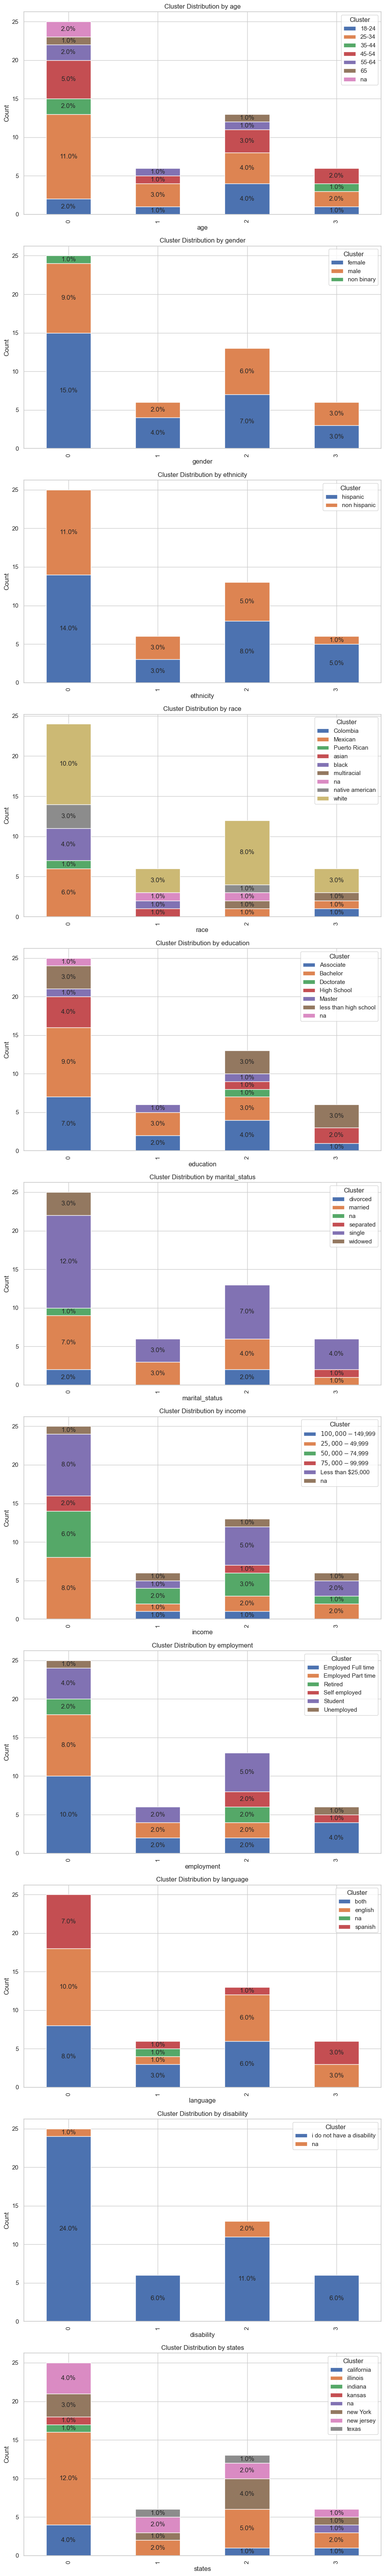

In [ ]:
categorical_attributes = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
                          'income', 'employment', 'language', 'disability', 'states']

# Plotting each categorical attribute against cluster distribution with percentages
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 6 * len(categorical_attributes)))

for idx, attribute in enumerate(categorical_attributes):
    ax = axes[idx]
    # Calculate counts and percentages by cluster and attribute
    attribute_counts = lle_df.groupby(['Cluster', attribute]).size().unstack(fill_value=0)
    attribute_percentages = attribute_counts.apply(lambda x: x / x.sum(), axis=1) * 100
    # Plotting stacked bar chart with percentages
    attribute_counts.plot(kind='bar', stacked=True, ax=ax)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0.5:  # Adjust this threshold as per your preference
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    ax.set_title(f'Cluster Distribution by {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.legend(title='Cluster')

plt.tight_layout()
plt.show()
